# Сверточные нейронные сети для распознавания образов;
## Множественная классификация с набором данных MNIST

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Data Research

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Visualization

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)

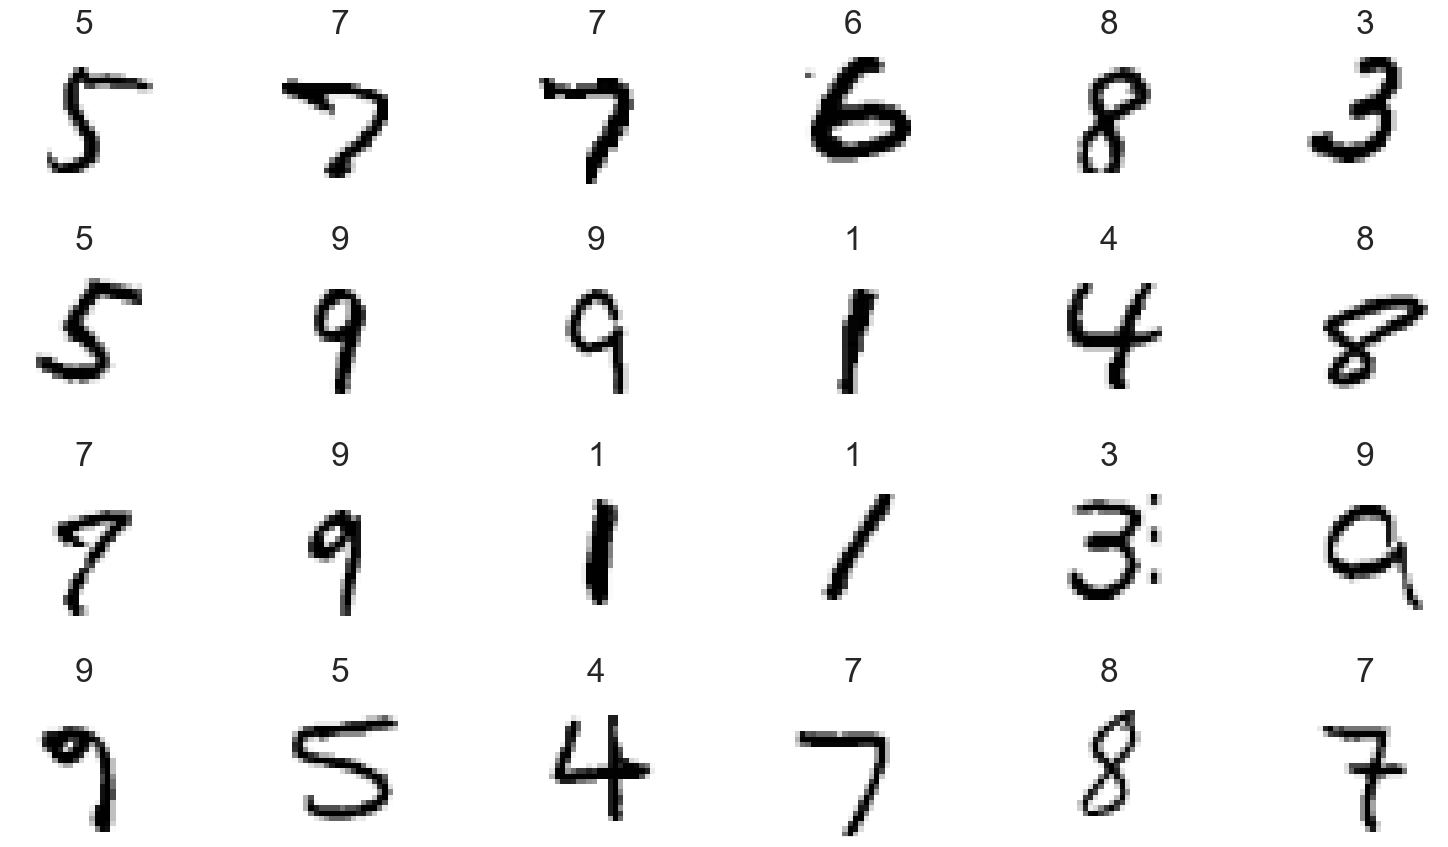

In [5]:
import numpy as np

index = np.random.choice(np.arange(len(X_train)), 24, replace=False)

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

### Preparing data

In [6]:
X_train = X_train.reshape((60000, 28, 28, 1))

print(X_train.shape)

X_test = X_test.reshape((10000, 28, 28, 1))

print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Normalize data

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

print(y_train.shape)

y_test = to_categorical(y_test)

print(y_test.shape)

(60000, 10)
(10000, 10)


### Creating neural network

In [8]:
from tensorflow.keras.models import Sequential

cnn = Sequential()


### Adding levels to network

In [9]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
cnn.add(Flatten())

In [12]:
cnn.add(Dense(units=128, activation='relu'))

In [13]:
cnn.add(Dense(units=10, activation='softmax'))

### Output 

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

### Visualization of structure

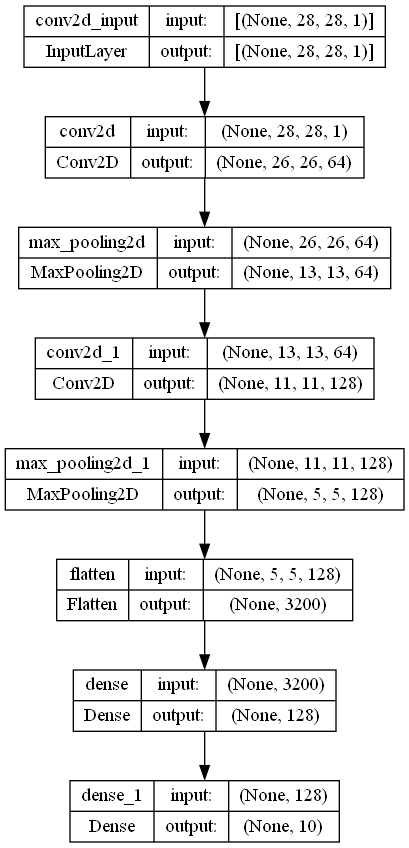

In [15]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(cnn, to_file='images/result.png', show_shapes=True, show_layer_names=True)

Image(filename='images/result.png')

### Compile

In [16]:
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Model training and evaluation

In [17]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 [==============================] - 25s 29ms/step - loss: 0.4799 - accuracy: 0.9449 - val_loss: 0.0571 - val_accuracy: 0.9833
Epoch 2/5
844/844 [==============================] - 24s 29ms/step - loss: 0.0573 - accuracy: 0.9829 - val_loss: 0.0527 - val_accuracy: 0.9830
Epoch 3/5
844/844 [==============================] - 24s 29ms/step - loss: 0.0410 - accuracy: 0.9874 - val_loss: 0.0532 - val_accuracy: 0.9857
Epoch 4/5
844/844 [==============================] - 25s 29ms/step - loss: 0.0326 - accuracy: 0.9901 - val_loss: 0.0524 - val_accuracy: 0.9873
Epoch 5/5
844/844 [==============================] - 24s 29ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0693 - val_accuracy: 0.9813


In [18]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0667 - accuracy: 0.9803


In [19]:
print(loss, accuracy)

0.06669843196868896 0.9803000092506409


### Making predictions

In [20]:
predictions = cnn.predict(X_test)

y_test[0]

313/313 [==============================] - 2s 5ms/step


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [21]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000002044%
1: 0.0000002110%
2: 0.0000156264%
3: 0.0001243576%
4: 0.0000000020%
5: 0.0000000325%
6: 0.0000000029%
7: 99.9998211861%
8: 0.0000004636%
9: 0.0000494547%


### Find wrong predictions

In [22]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

len(incorrect_predictions)

197

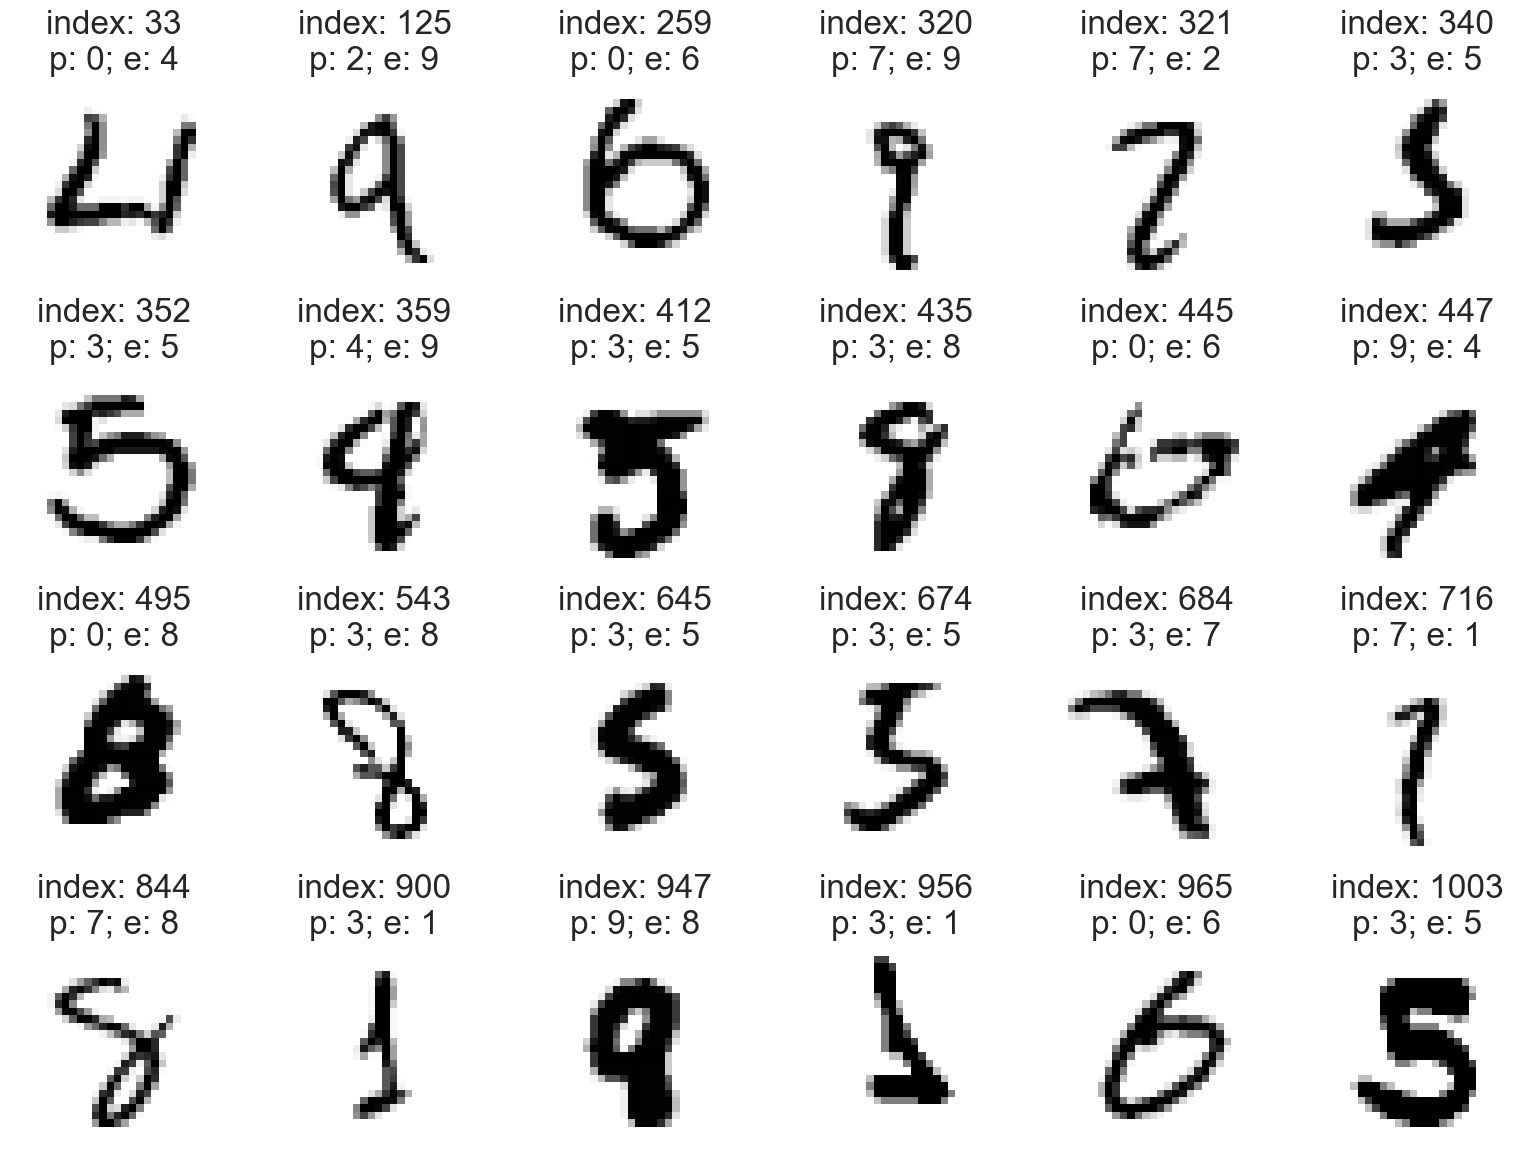

In [23]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')

plt.tight_layout()

### Display prbables for few wrong predictions

In [24]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')
        
display_probabilities(predictions[965])

0: 87.9222869873%
1: 0.0002846230%
2: 0.0004154804%
3: 0.0002231553%
4: 0.0000783982%
5: 0.0752107590%
6: 11.8727073073%
7: 0.0000186117%
8: 0.1241849037%
9: 0.0045950408%


### Save model

In [27]:
cnn.save('models/mnist_cnn.h5')


### Load Model

In [28]:
from tensorflow.keras.models import load_model
cnn = load_model('models/mnist_cnn.h5')